In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from scipy.spatial import distance
from IPython.display import display

In [11]:
#PARTE 1

class GaussianClass:
    def __init__(self, mean, covariance, num_samples):
        self.mean = mean
        self.covariance = covariance
        self.num_samples = num_samples

    def generate_samples(self):
        return np.random.multivariate_normal(self.mean, self.covariance, self.num_samples)

In [12]:
# Definindo as médias e matrizes de covariância para três classes gaussianas
mean1 = [0, 0]
cov1 = [[1, 0.5], [0.5, 1]]

mean2 = [3, 3]
cov2 = [[1, -0.5], [-0.5, 1]]

mean3 = [-3, 2]
cov3 = [[1, 0], [0, 1]]

# Criando instâncias das classes gaussianas
class1 = GaussianClass(mean1, cov1, 100)
class2 = GaussianClass(mean2, cov2, 100)
class3 = GaussianClass(mean3, cov3, 100)

# Gerando amostras
samples1 = class1.generate_samples()
samples2 = class2.generate_samples()
samples3 = class3.generate_samples()

# Criando um DataFrame para facilitar a manipulação dos dados
X_train = np.vstack((samples1, samples2, samples3))
y_train = np.array([0]*100 + [1]*100 + [2]*100)  # Rótulos para as classe

In [13]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Padronizando os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_test_scaled = scaler.transform(X_test_split)

# Base de dados que varia de [0.1, 0.2, 0.3, 0.4]
test_data_variations = np.array([[x * 10 - 5 for x in [0.1]], 
                                  [x * 10 - 5 for x in [0.2]], 
                                  [x * 10 - 5 for x in [0.3]], 
                                  [x * 10 - 5 for x in [0.4]]])

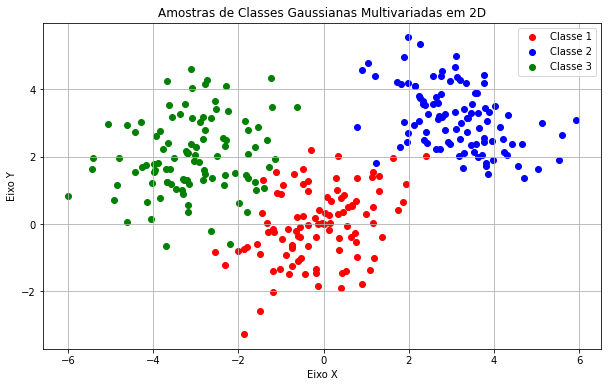

In [24]:
# Plotando os dados em um gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(samples1[:, 0], samples1[:, 1], color='red', label='Classe 1')
plt.scatter(samples2[:, 0], samples2[:, 1], color='blue', label='Classe 2')
plt.scatter(samples3[:, 0], samples3[:, 1], color='green', label='Classe 3')

plt.title('Amostras de Classes Gaussianas Multivariadas em 2D')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend()
plt.grid()
plt.show()


In [15]:
#PARTE 2

# Classe KNN modificada
class KNN:
    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            distances = self.calculate_distances(test_point)
            k_nearest_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]
            predictions.append(np.bincount(k_nearest_labels).argmax())
        return np.array(predictions)

    def calculate_distances(self, test_point):
        if self.distance_metric == 'euclidean':
            return np.linalg.norm(self.X_train - test_point, axis=1)
        elif self.distance_metric == 'manhattan':
            return np.sum(np.abs(self.X_train - test_point), axis=1)
        elif self.distance_metric == 'chebyshev':
            return np.max(np.abs(self.X_train - test_point), axis=1)
        else:
            raise ValueError("Métrica de distância não suportada.")

Métrica de distância: euclidean, K=1
[[20  1  1]
 [ 0 16  0]
 [ 2  0 20]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.94      1.00      0.97        16
           2       0.95      0.91      0.93        22

    accuracy                           0.93        60
   macro avg       0.93      0.94      0.94        60
weighted avg       0.93      0.93      0.93        60

Métrica de distância: euclidean, K=3
[[20  1  1]
 [ 0 16  0]
 [ 1  0 21]]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.94      1.00      0.97        16
           2       0.95      0.95      0.95        22

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

Métrica de distância: euclidean, K=5
[[20  1  1]
 [ 0 16  0]
 [ 3  0 19]]
              pr

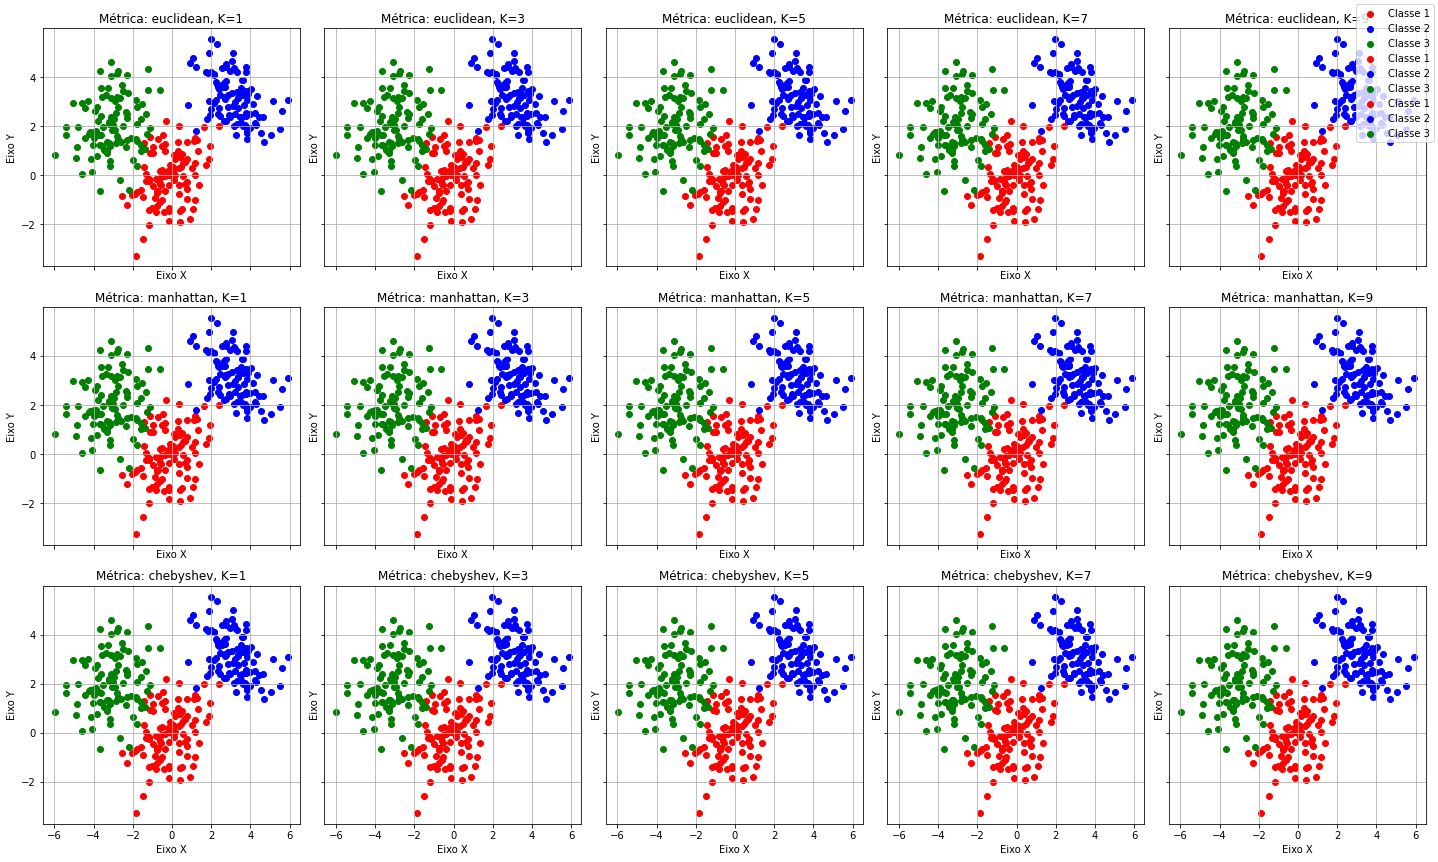

In [16]:
# Testando o KNN com diferentes métricas de distância e valores de K
metrics = ['euclidean', 'manhattan', 'chebyshev']
k_values = range(1, 10, 2)

# Criando subplots para comparar as métricas
fig, axes = plt.subplots(len(metrics), len(k_values), figsize=(20, 12), sharex=True, sharey=True)

for i, metric in enumerate(metrics):
    for j, k in enumerate(k_values):
        knn_model = KNN(k=k, distance_metric=metric)
        knn_model.fit(X_train_scaled, y_train_split)
        
        # Predições para o conjunto de teste
        predictions = knn_model.predict(X_test_scaled)
        
        # Matriz de confusão e relatório de classificação
        cm = confusion_matrix(y_test_split, predictions)
        print(f'Métrica de distância: {metric}, K={k}')
        print(cm)
        print(classification_report(y_test_split, predictions))
        
        # Plotando o resultado de cada combinação de métrica e K
        ax = axes[i, j]
        ax.scatter(samples1[:, 0], samples1[:, 1], color='red', label='Classe 1' if j == 0 else "")
        ax.scatter(samples2[:, 0], samples2[:, 1], color='blue', label='Classe 2' if j == 0 else "")
        ax.scatter(samples3[:, 0], samples3[:, 1], color='green', label='Classe 3' if j == 0 else "")
        
        # Título e configurações do plot
        ax.set_title(f'Métrica: {metric}, K={k}')
        ax.set_xlabel('Eixo X')
        ax.set_ylabel('Eixo Y')
        ax.grid()

# Ajuste final da figura e exibição da legenda
fig.tight_layout()
fig.legend(loc='upper right')
plt.show()

In [17]:
#Parte 3

from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score, f1_score

In [18]:
# Função para calcular média e matriz de covariância de cada classe
def calculate_class_stats(X, y):
    class_stats = {}
    for class_label in np.unique(y):
        class_data = X[y == class_label]
        mean = np.mean(class_data, axis=0)
        covariance = np.cov(class_data, rowvar=False)
        class_stats[class_label] = (mean, covariance)
    return class_stats

In [19]:
# Calculando média e matriz de covariância para cada classe
class_stats = calculate_class_stats(X_train_scaled, y_train_split)

# Função para prever a classe usando a densidade de probabilidade gaussiana
def predict_with_gaussian(X_test, class_stats):
    predictions = []
    for test_point in X_test:
        probabilities = []
        for class_label, (mean, covariance) in class_stats.items():
            prob = multivariate_normal.pdf(test_point, mean=mean, cov=covariance)
            probabilities.append(prob)
        predicted_class = np.argmax(probabilities)
        predictions.append(predicted_class)
    return np.array(predictions)

# Fazendo previsões com os dados de teste
gaussian_predictions = predict_with_gaussian(X_test_scaled, class_stats)

# Calculando a acurácia e F1-score
accuracy = accuracy_score(y_test_split, gaussian_predictions)
f1 = f1_score(y_test_split, gaussian_predictions, average='weighted')

# Matriz de confusão
confusion_mat = confusion_matrix(y_test_split, gaussian_predictions)

Acurácia: 0.95
F1-score: 0.9499741602067183
Matriz de Confusão:
 [[21  0  1]
 [ 0 16  0]
 [ 2  0 20]]


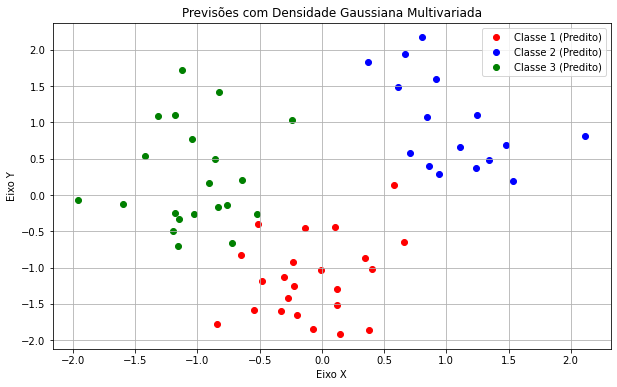

In [22]:
# Exibindo os resultados
print("Acurácia:", accuracy)
print("F1-score:", f1)
print("Matriz de Confusão:\n", confusion_mat)

# Plotando os resultados das previsões
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[gaussian_predictions == 0][:, 0], X_test_scaled[gaussian_predictions == 0][:, 1], color='red', label='Classe 1 (Predito)')
plt.scatter(X_test_scaled[gaussian_predictions == 1][:, 0], X_test_scaled[gaussian_predictions == 1][:, 1], color='blue', label='Classe 2 (Predito)')
plt.scatter(X_test_scaled[gaussian_predictions == 2][:, 0], X_test_scaled[gaussian_predictions == 2][:, 1], color='green', label='Classe 3 (Predito)')
plt.title('Previsões com Densidade Gaussiana Multivariada')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend()
plt.grid()
plt.show()

In [25]:
#PARTE 4

class NaiveBayes:
    def __init__(self):
        self.class_stats = {}
        self.class_priors = {}

    def fit(self, X_train, y_train):
        # Calcula média e desvio padrão para cada atributo em cada classe
        for class_label in np.unique(y_train):
            class_data = X_train[y_train == class_label]
            mean = np.mean(class_data, axis=0)
            std_dev = np.std(class_data, axis=0)
            self.class_stats[class_label] = (mean, std_dev)
            # Calcula a probabilidade a priori da classe
            self.class_priors[class_label] = len(class_data) / len(X_train)

    def predict(self, X_test):
        predictions = []
        for test_point in X_test:
            probabilities = []
            for class_label, (mean, std_dev) in self.class_stats.items():
                # Calcula a probabilidade de cada atributo dado a classe usando a distribuição normal
                prob = self.calculate_class_probability(test_point, mean, std_dev)
                # Multiplica pela probabilidade a priori da classe
                total_prob = prob * self.class_priors[class_label]
                probabilities.append(total_prob)
            predicted_class = np.argmax(probabilities)
            predictions.append(predicted_class)
        return np.array(predictions)

    def calculate_class_probability(self, test_point, mean, std_dev):
        # Função de densidade de probabilidade gaussiana univariada
        exponent = np.exp(-((test_point - mean) ** 2) / (2 * (std_dev ** 2)))
        return (1 / (std_dev * np.sqrt(2 * np.pi))) * exponent

In [26]:
# Instanciando e treinando o modelo Naïve Bayes
naive_bayes_model = NaiveBayes()
naive_bayes_model.fit(X_train_scaled, y_train_split)

# Fazendo previsões com os dados de teste
naive_bayes_predictions = naive_bayes_model.predict(X_test_scaled)

# Calculando a acurácia e F1-score
accuracy_nb = accuracy_score(y_test_split, naive_bayes_predictions)
f1_nb = f1_score(y_test_split, naive_bayes_predictions, average='weighted')

# Matriz de confusão
confusion_mat_nb = confusion_matrix(y_test_split, naive_bayes_predictions)

# Exibindo os resultados
print("Acurácia do Naïve Bayes:", accuracy_nb)
print("F1-score do Naïve Bayes:", f1_nb)
print("Matriz de Confusão do Naïve Bayes:\n", confusion_mat_nb)

Acurácia do Naïve Bayes: 0.26666666666666666
F1-score do Naïve Bayes: 0.2861788617886179
Matriz de Confusão do Naïve Bayes:
 [[16  2  1  0  1  2]
 [ 1  0 12  3  0  0]
 [ 2  1  0  0 16  3]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]
 [ 0  0  0  0  0  0]]


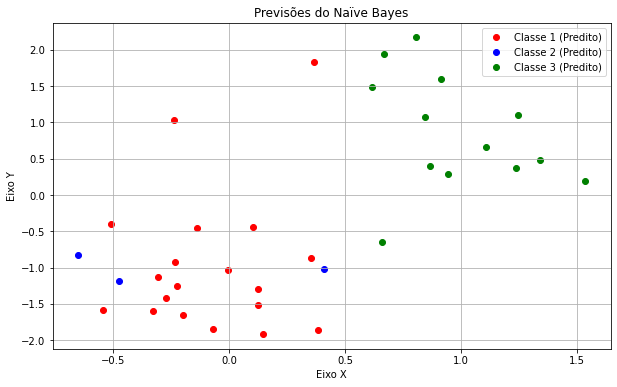

In [27]:
# Plotando os resultados das previsões do Naïve Bayes
plt.figure(figsize=(10, 6))
plt.scatter(X_test_scaled[naive_bayes_predictions == 0][:, 0], X_test_scaled[naive_bayes_predictions == 0][:, 1], color='red', label='Classe 1 (Predito)')
plt.scatter(X_test_scaled[naive_bayes_predictions == 1][:, 0], X_test_scaled[naive_bayes_predictions == 1][:, 1], color='blue', label='Classe 2 (Predito)')
plt.scatter(X_test_scaled[naive_bayes_predictions == 2][:, 0], X_test_scaled[naive_bayes_predictions == 2][:, 1], color='green', label='Classe 3 (Predito)')
plt.title('Previsões do Naïve Bayes')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.legend()
plt.grid()
plt.show()

In [29]:
#PARTE 5

def plot_decision_regions(X, y, model, ax, title):
    # Cria um grid de pontos
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Faz previsões para cada ponto no grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plota as regiões de decisão
    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
    ax.set_title(title)

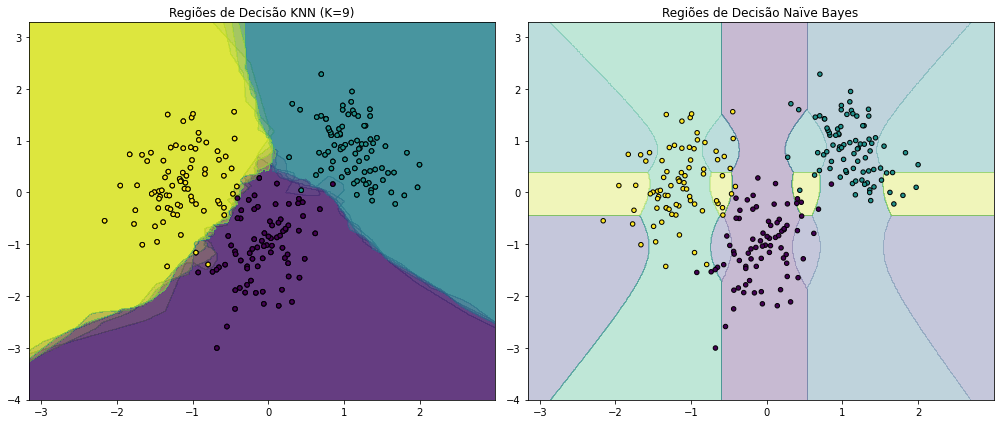

In [32]:
# Criando uma figura para os gráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plotando regiões de decisão para KNN
for k in k_values:
    knn_model = KNN(k=k)
    knn_model.fit(X_train_scaled, y_train_split)
    plot_decision_regions(X_train_scaled, y_train_split, knn_model, axes[0], f'Regiões de Decisão KNN (K={k})')

# Plotando regiões de decisão para Naïve Bayes
naive_bayes_model.fit(X_train_scaled, y_train_split)
plot_decision_regions(X_train_scaled, y_train_split, naive_bayes_model, axes[1], 'Regiões de Decisão Naïve Bayes')

plt.tight_layout()
plt.show()